In [ ]:
!rm -r deep_q_network
!tar -xzvf deep_q_network.tar.gz

In [ ]:
!apt-get install -y swig
!pip install --upgrade pip
!pip install -r /kaggle/input/drl-requirements/requirements.txt

In [1]:
import sys
import logging
import random

sys.path.append("/kaggle/input/deep-q-network")

logging.getLogger().addHandler(logging.StreamHandler(sys.stdout))
logging.getLogger().setLevel(logging.INFO)

In [2]:
import matplotlib.pyplot as plt
import gym
import torch
import numpy as np

In [3]:
from deep_q_network.agents import DQNAgent
from deep_q_network.trainers import (
    HardTargetNetworkTrainer,
    SoftTargetNetworkTrainer,
    DoubleDQNTrainer,
)

In [4]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

In [5]:
env = gym.make("LunarLander-v2")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [6]:
def plot_total_rewards(history, window_size=100):
    if window_size % 2 == 0:
        raise RuntimeError("Even window_size was specified")
    total_rewards = np.array(
        [sum(trajectory["rewards"]) for trajectory in history]
    )
    mean_total_rewards = np.lib.stride_tricks.sliding_window_view(
        total_rewards, window_shape=window_size,
    ).mean(axis=1)
    trajectory_indices = np.arange(
        window_size // 2, total_rewards.shape[0] - window_size // 2
    )
    plt.plot(trajectory_indices, mean_total_rewards)

# DQN

In [ ]:
agent = DQNAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.n,
    hidden_sizes=[192],
    device=DEVICE,
)
agent.network

In [ ]:
trainer = HardTargetNetworkTrainer(
    n_episodes=12000,
    lr=0.001,
    batch_size=64,
    max_trajectory_length=1000,
    n_network_update_steps=1,
    gamma=0.99,
    epsilon_decay=-np.log(0.01) / 100000,
    device=DEVICE,
)

In [ ]:
history = trainer.train(
    agent, env, n_episodes_per_log=100, history_file_path="LunarLander-v2_dqn.jsonl"
)

In [ ]:
plot_total_rewards(history, window_size=101)

In [ ]:
agent.save("dqn.pth")

# Hard Target Network DQN

In [ ]:
agent = DQNAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.n,
    hidden_sizes=[192],
    device=DEVICE,
)

In [ ]:
trainer = HardTargetNetworkTrainer(
    n_episodes=2000,
    lr=0.001,
    batch_size=64,
    max_trajectory_length=1000,
    n_network_update_steps=3,
    gamma=0.99,
    epsilon_decay=-np.log(0.01) / 100000,
    device=DEVICE
)

In [ ]:
history = trainer.train(
    agent,
    env,
    n_episodes_per_log=100,
    history_file_path="LunarLander-v2_hard_target_network_dqn.jsonl",
)

In [ ]:
plot_total_rewards(history, window_size=101)

In [ ]:
agent.save("hard_target_network_dqn.pth")

# Soft Target Network DQN

In [ ]:
agent = DQNAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.n,
    hidden_sizes=[192],
    device=DEVICE,
)

In [ ]:
trainer = SoftTargetNetworkTrainer(
    n_episodes=2000,
    lr=0.001,
    batch_size=64,
    max_trajectory_length=1000,
    gamma=0.99,
    epsilon_decay=-np.log(0.01) / 100000,
    target_update_tau=0.01,
    device=DEVICE,
)

In [ ]:
history = trainer.train(
    agent,
    env,
    n_episodes_per_log=100,
    history_file_path="LunarLander-v2_soft_target_network_dqn.jsonl",
)

In [ ]:
plot_total_rewards(history, window_size=51)

In [ ]:
agent.save("soft_target_network_dqn.pth")

# Double DQN

In [7]:
agent = DQNAgent(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.n,
    hidden_sizes=[192],
    device=DEVICE,
)

In [9]:
trainer = DoubleDQNTrainer(
    n_episodes=2000,
    lr=0.001,
    batch_size=64,
    max_trajectory_length=1000,
    gamma=0.99,
    epsilon_decay=-np.log(0.01) / 100000,
    target_update_tau=0.01,
    device=DEVICE,
)

In [10]:
history = trainer.train(
    agent,
    env,
    n_episodes_per_log=100,
    history_file_path="LunarLander-v2_double_dqn.jsonl",
)

Layer Sequential(
  (0): Linear(in_features=8, out_features=192, bias=True)
  (1): ReLU()
  (2): Linear(in_features=192, out_features=4, bias=True)
) doesn't have reset_parameters method
Layer ReLU() doesn't have reset_parameters method
Episode №1
Mean MSE loss: 7.11
Total reward: -87.62
Epsilon: 1.00
Episode №101
Mean MSE loss: 47.12
Total reward: -47.44
Epsilon: 0.60
Episode №201
Mean MSE loss: 20.99
Total reward: -22.26
Epsilon: 0.09
Episode №301
Mean MSE loss: 7.36
Total reward: -213.99
Epsilon: 0.00
Episode №401
Mean MSE loss: 7.24
Total reward: 238.97
Epsilon: 0.00
Episode №501
Mean MSE loss: 7.02
Total reward: 219.31
Epsilon: 0.00
Episode №601
Mean MSE loss: 8.66
Total reward: 207.24
Epsilon: 0.00
Episode №701
Mean MSE loss: 8.53
Total reward: 219.39
Epsilon: 0.00
Episode №801
Mean MSE loss: 12.16
Total reward: 252.30
Epsilon: 0.00
Episode №901
Mean MSE loss: 7.85
Total reward: 236.13
Epsilon: 0.00
Episode №1001
Mean MSE loss: 9.81
Total reward: 26.14
Epsilon: 0.00
Episode №1101

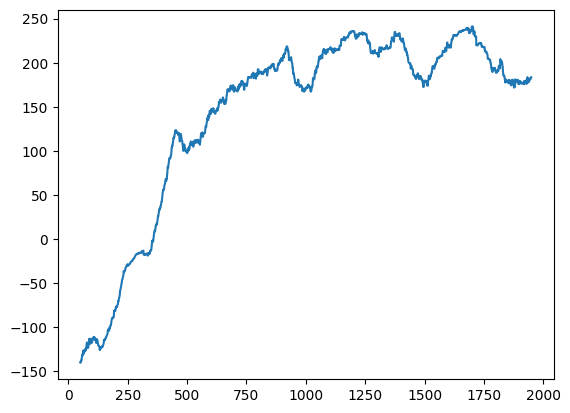

In [15]:
plot_total_rewards(history, window_size=101)

In [16]:
agent.save("double_dqn.pth")